**Anna Camprubí i Buxeda and Gema Novo Rego**

<a id="0"></a> <br>
# Index

1. [Load the data](#7)
1. [Preprocessing the data](#2)
1. [Cluster Analysis](#6)
    1. [Hierarchical Clustering](#8)
    1. [Partitional Clustering](#9)
    1. [DBSCAN](#10)
    1. [Gaussian Mixture Model](#11)

# 1. Load the data

First, we will load the data and take an initial look at its structure to understand how to proceed.

In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')
data.head()

,AC002076_cds2_at,M68840_at,HG3521-HT3715_at,X59710_at,L22569_at,M76125_s_at,U93049_at,M73548_at,L32832_s_at,U07856_at,...,X15357_at,D87685_at,U69140_s_at,D50857_at,X84194_at,X55989_rna1_at,Y11416_at,K01884_at,L27050_at,M97496_at
0,-68,-21,830,73,-309,-106,299,125,-16,-18,...,715,86,78,69,185,279,-139,-26,-146,333
1,14,-150,1302,126,-333,-105,605,-13,175,-37,...,262,124,65,146,43,26,-564,79,-139,249
2,-58,130,2098,50,-246,-192,2124,23,-7,45,...,471,163,31,337,209,114,-336,6,-239,575
3,-35,-15,1039,49,-481,-171,-320,45,166,-50,...,2,140,120,191,289,215,-281,-47,-165,223
4,18,-31,1607,84,-160,-38,-17,64,133,-51,...,384,140,160,115,326,173,-429,-5,-69,189


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 2800 entries, AC002076_cds2_at to M97496_at
dtypes: float64(10), int64(2788), object(2)
memory usage: 1.5+ MB


In [ ]:
summary_statistics = data.describe()
summary_statistics

,AC002076_cds2_at,M68840_at,HG3521-HT3715_at,X59710_at,L22569_at,M76125_s_at,U93049_at,M73548_at,L32832_s_at,U07856_at,...,X15357_at,D87685_at,U69140_s_at,D50857_at,X84194_at,X55989_rna1_at,Y11416_at,K01884_at,L27050_at,M97496_at
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,-9.055556,-18.513889,986.000000,37.222222,-401.888889,-70.666667,182.513889,34.972222,136.638889,-33.652778,...,283.930556,127.013889,67.972222,220.569444,161.138889,132.111111,-239.319444,2.638889,-123.750000,139.208333
std,50.300474,131.769965,570.245808,35.710188,259.530647,89.636355,478.907854,52.067121,153.695813,42.962860,...,191.552025,97.477840,122.246918,134.304869,90.378750,165.015454,164.737249,56.761995,72.451781,207.422542
min,-185.000000,-355.000000,188.000000,-38.000000,-1200.000000,-259.000000,-320.000000,-79.000000,-47.000000,-148.000000,...,2.000000,-33.000000,-113.000000,-40.000000,-32.000000,-194.000000,-750.000000,-113.000000,-400.000000,-340.000000
25%,-32.000000,-83.750000,538.750000,12.250000,-478.750000,-132.500000,-95.750000,-4.000000,49.500000,-57.250000,...,152.750000,61.000000,2.750000,123.000000,109.500000,16.750000,-336.750000,-31.000000,-165.250000,-19.750000
50%,-8.500000,-26.000000,845.000000,31.000000,-346.000000,-70.500000,15.000000,29.500000,113.000000,-37.000000,...,236.000000,109.000000,52.000000,192.500000,147.500000,94.500000,-227.500000,-4.000000,-125.500000,187.000000
75%,18.000000,41.250000,1284.000000,65.000000,-218.500000,-11.500000,256.250000,72.500000,174.250000,-6.000000,...,388.250000,160.750000,109.000000,269.250000,210.750000,216.000000,-126.000000,29.750000,-78.250000,295.250000
max,199.000000,422.000000,2535.000000,148.000000,-17.000000,194.000000,2124.000000,212.000000,850.000000,56.000000,...,812.000000,469.000000,892.000000,660.000000,415.000000,645.000000,46.000000,152.000000,2.000000,598.000000


In [ ]:
column_names = data.columns
column_names

Index(['AC002076_cds2_at', 'M68840_at', 'HG3521-HT3715_at', 'X59710_at',
       'L22569_at', 'M76125_s_at', 'U93049_at', 'M73548_at', 'L32832_s_at',
       'U07856_at',
       ...
       'X15357_at', 'D87685_at', 'U69140_s_at', 'D50857_at', 'X84194_at',
       'X55989_rna1_at', 'Y11416_at', 'K01884_at', 'L27050_at', 'M97496_at'],
      dtype='object', length=2800)

In [ ]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
print(data.isnull().sum().value_counts())

0    2800
Name: count, dtype: int64


The dataset does not have missing values or duplicated values in the numerical features, so they are cleaned.

In [ ]:
# Display the categorical columns in the data, to know what we need to convert
categorical_data = data.select_dtypes(include=['object'])
print(categorical_data)

   U95019_s_at HG3729-HT3999_f_at
0         high                low
1         high                low
2          low               high
3          low             medium
4         high                low
..         ...                ...
67        high             medium
68        high                low
69        high                low
70        high             medium
71         low             medium

[72 rows x 2 columns]


In [ ]:
# Count unique values for each specified object-type column and display the counts
object_columns = data[["U95019_s_at","HG3729-HT3999_f_at"]]
for column in object_columns.columns:
    value_counts = object_columns[column].value_counts()
    print(f"\nValue counts for '{column}':")
    print(value_counts)


Value counts for 'U95019_s_at':
U95019_s_at
high    43
low     29
Name: count, dtype: int64

Value counts for 'HG3729-HT3999_f_at':
HG3729-HT3999_f_at
medium    33
low       32
high       7
Name: count, dtype: int64


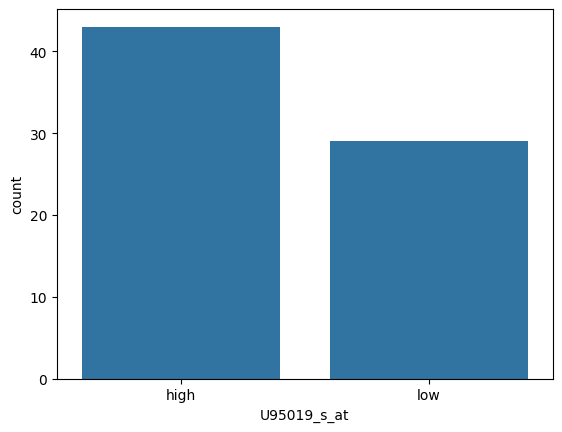

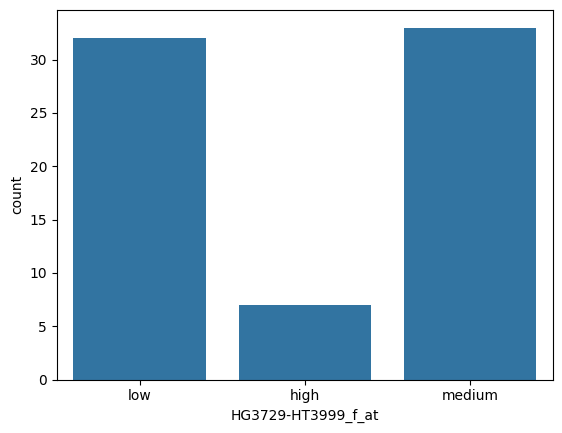

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='U95019_s_at')
plt.show()
sns.countplot(data=data, x='HG3729-HT3999_f_at')
plt.show()


Let's observe the distribution of the data

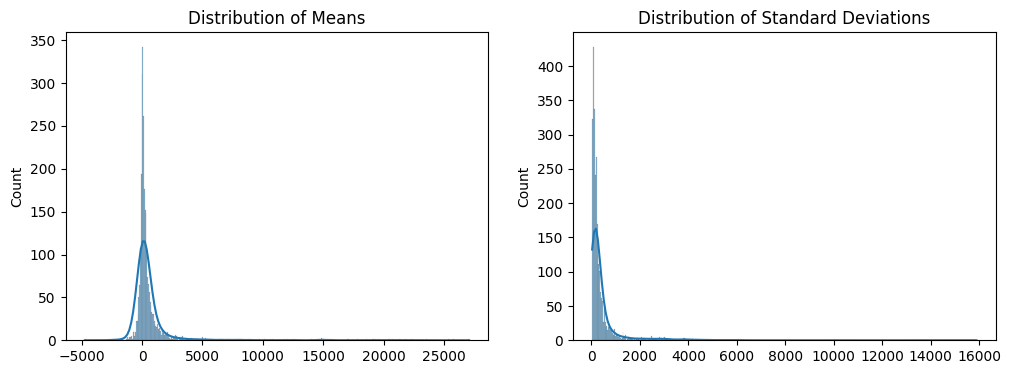

In [ ]:
import numpy as np
numeric_data = data.select_dtypes(include=np.number)
means = numeric_data.mean(axis=0)
stds = numeric_data.std(axis=0)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(means, kde=True)
plt.title("Distribution of Means")

plt.subplot(1, 2, 2)
sns.histplot(stds, kde=True)
plt.title("Distribution of Standard Deviations")

plt.show()

Both distributions deviate from normality, as they are skewed and have long tails. It makes sense because gene expression usually contain outliers and high variance.

# 2. Preprocessing the data


Gene expression data often contains outliers and high variance across features, especially if there are genes with low expression that may spike in specific conditions or samples. Since we observed some skewed expression distributions across genes, RobustScaler can be a good choice, as it provides more stable scaling in the presence of extreme values, as it minimizes their influence.

Now we are going to convert categorical variables to numerical with Ordinal Encoder and scale the data with RobustScaler, all in a pipeline.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

categorical_columns = ['U95019_s_at', 'HG3729-HT3999_f_at']
numerical_columns = list(data.drop(categorical_columns, axis=1).columns)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42) #Split the data before fitting the pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), categorical_columns),
        ('scaler', RobustScaler(quantile_range=(25.0, 75.0)), numerical_columns)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

train_processed = pipeline.fit_transform(train_data)
test_processed = pipeline.transform(test_data)

print("Train shape:", train_processed.shape)
print("Test shape:", test_processed.shape)


Train shape: (57, 2800)
Test shape: (15, 2800)


We want to check if there was a successful encoding:

In [ ]:
train_processed = pipeline.fit_transform(train_data)

ordinal_encoded_data = pipeline.named_steps['preprocessor'].transformers_[0][1].transform(train_data[['U95019_s_at', 'HG3729-HT3999_f_at']])
ordinal_encoded_df = pd.DataFrame(ordinal_encoded_data, columns=['U95019_s_at', 'HG3729-HT3999_f_at'], index=train_data.index)

print(ordinal_encoded_df)


    U95019_s_at  HG3729-HT3999_f_at
22          0.0                 1.0
56          0.0                 2.0
49          0.0                 0.0
33          0.0                 1.0
39          1.0                 2.0
59          1.0                 2.0
16          0.0                 1.0
35          0.0                 1.0
44          1.0                 0.0
69          0.0                 1.0
7           0.0                 0.0
55          1.0                 1.0
42          1.0                 1.0
30          0.0                 2.0
46          1.0                 1.0
71          1.0                 2.0
19          0.0                 1.0
58          0.0                 2.0
25          0.0                 2.0
40          0.0                 2.0
13          1.0                 2.0
64          1.0                 2.0
3           1.0                 2.0
17          0.0                 2.0
38          0.0                 1.0
8           0.0                 1.0
57          1.0             

We succedeed in converting all to float. Now we are gonna check again the distribution of the data to see how it changed after doing the scaling.

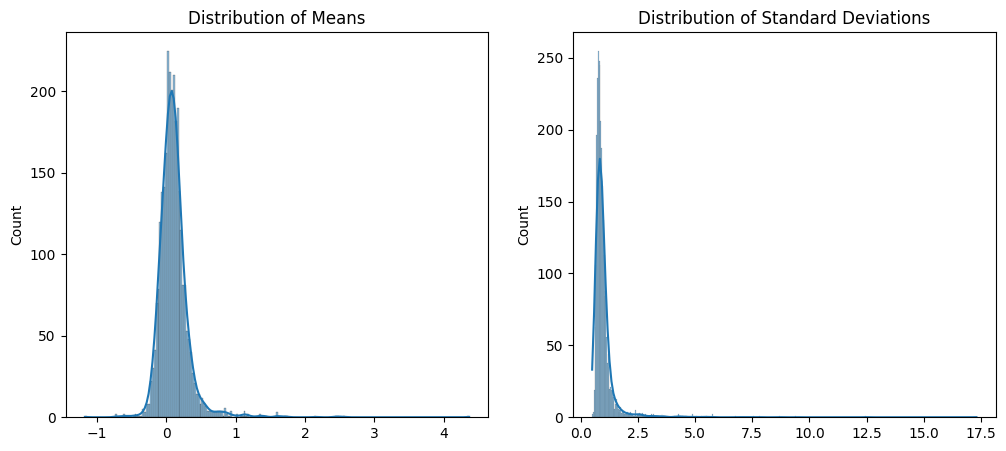

In [ ]:
means = train_processed.mean(axis = 0)
stds = train_processed.std(axis = 0)

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(means, kde = True)
plt.title("Distribution of Means")

plt.subplot(1, 2, 2)
sns.histplot(stds, kde = True)
plt.title("Distribution of Standard Deviations")

plt.show()

Now these distributions are closer to normality than before scaling, though some skewness remains, particularly in the standard deviation distribution.

# 3. Cluster Analysis

<a id="8"></a>
## Hierarchical Clustering

We compare different links with different distances, included in lists, to identify the significant clusters with hierarchical clustring. Silhouette score will help us to determine the distance between the clusters and we can use this score to select the best configuration.




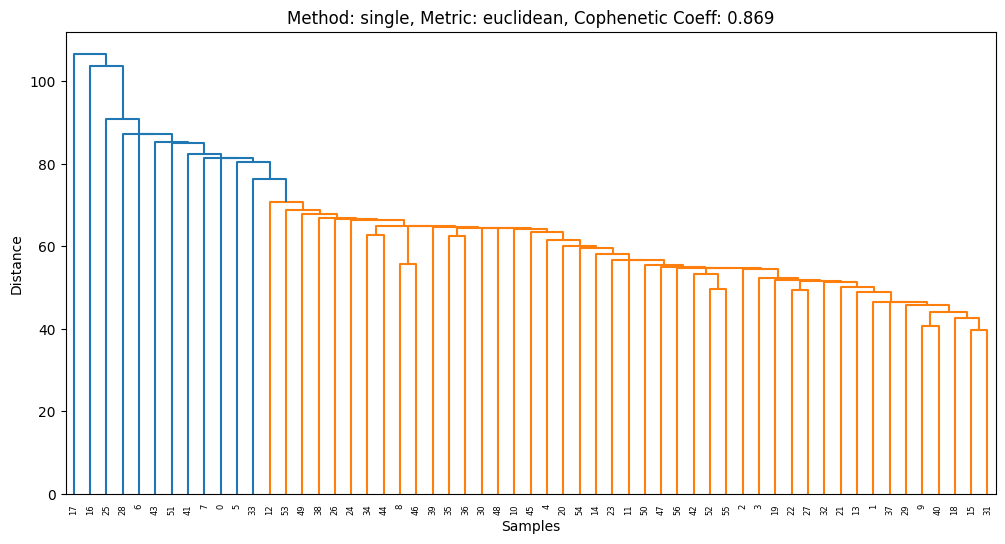

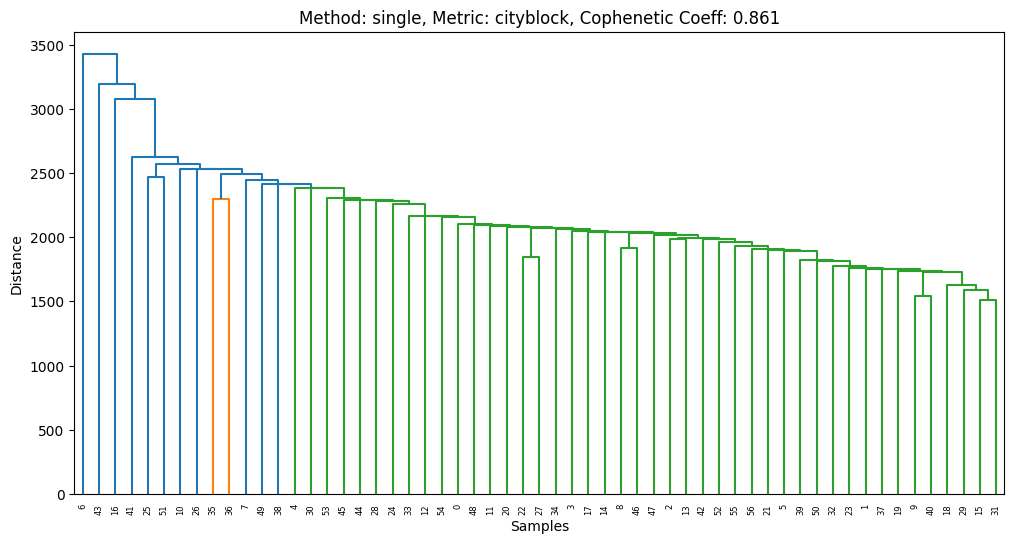

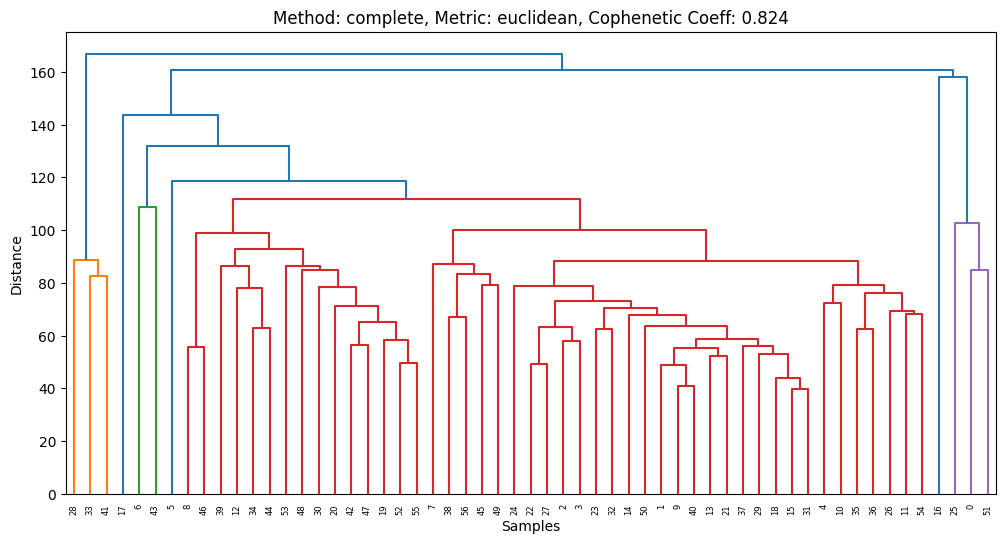

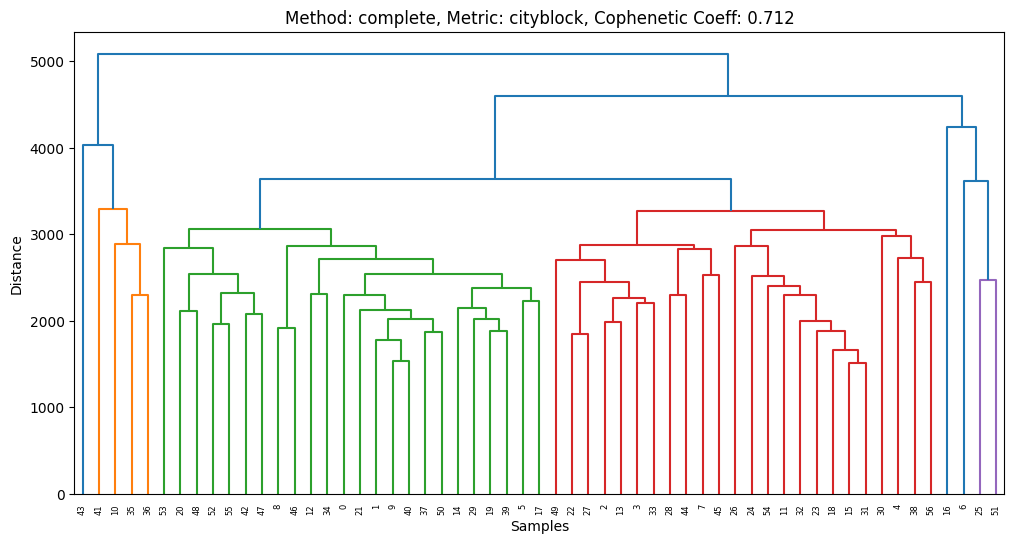

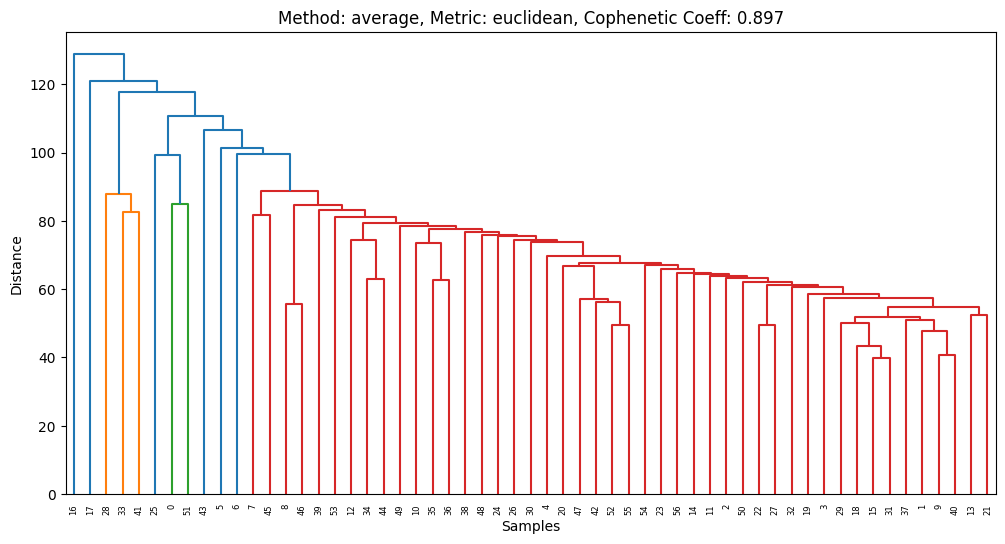

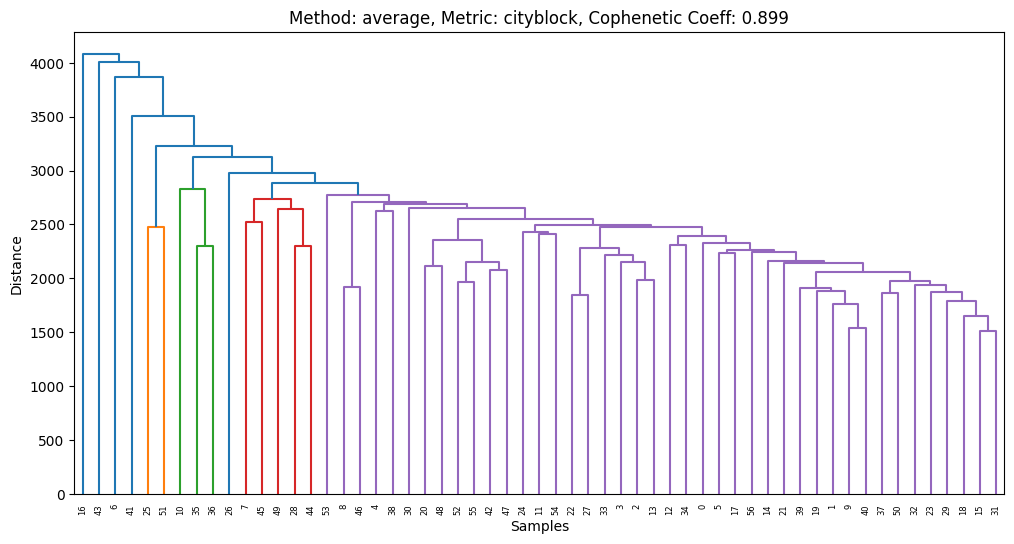

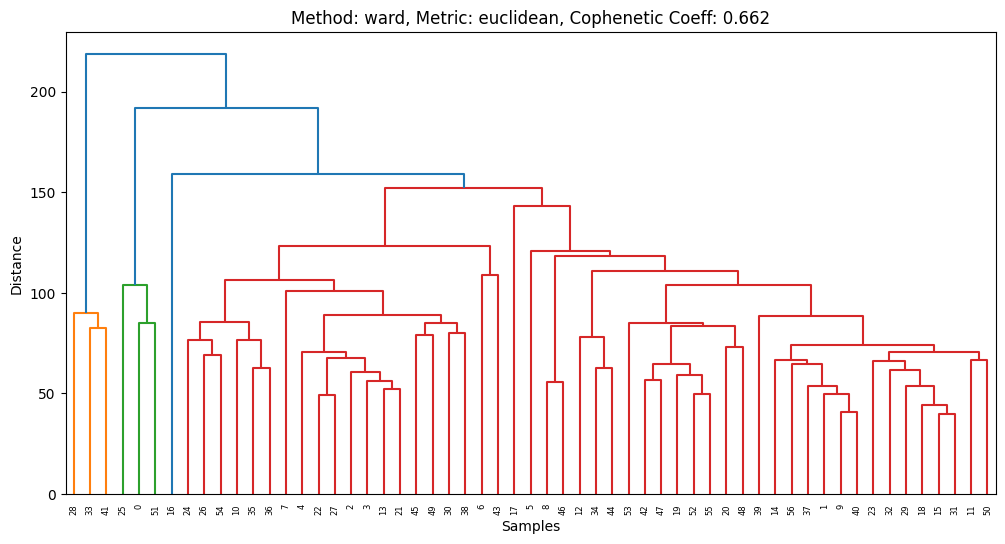


Best Combination:
Method: average
Metric: cityblock
Cophenetic Coefficient: 0.899


In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cityblock']

best_coefficient = -1
best_combination = {'method': None, 'metric': None}

for method in methods:
    for metric in distance_metrics:
        if method == 'ward' and metric != 'euclidean':
            continue  # Ward only works with Euclidean distance

        distance_matrix = pdist(train_processed, metric=metric)
        linkage_matrix = sch.linkage(distance_matrix, method=method)

        coefficient, _ = cophenet(linkage_matrix, distance_matrix)

        if coefficient > best_coefficient:
            best_coefficient = coefficient
            best_combination = {'method': method, 'metric': metric}

        plt.figure(figsize=(12, 6))
        sch.dendrogram(linkage_matrix)
        plt.title(f"Method: {method}, Metric: {metric}, Cophenetic Coeff: {round(coefficient, 3)}")
        plt.xlabel("Samples")
        plt.ylabel("Distance")
        plt.show()

print("\nBest Combination:")
print(f"Method: {best_combination['method']}")
print(f"Metric: {best_combination['metric']}")
print(f"Cophenetic Coefficient: {round(best_coefficient, 3)}")


Now, we will display the best number of clusters and its silhouette score.


In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

best_k = 0
best_silhouette = -1

for k in range(2, 11):
    clusters = fcluster(linkage_matrix, t=k, criterion='maxclust')

    silhouette_avg = silhouette_score(train_processed, clusters, metric='euclidean')

    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

    print(f"Number of clusters: {k}, Silhouette Score: {round(silhouette_avg, 3)}")

print(f"\nBest number of clusters: {best_k} with silhouette score: {round(best_silhouette, 3)}")


Number of clusters: 2, Silhouette Score: 0.293
Number of clusters: 3, Silhouette Score: 0.268
Number of clusters: 4, Silhouette Score: 0.272
Number of clusters: 5, Silhouette Score: 0.07
Number of clusters: 6, Silhouette Score: 0.072
Number of clusters: 7, Silhouette Score: 0.059
Number of clusters: 8, Silhouette Score: 0.062
Number of clusters: 9, Silhouette Score: 0.071
Number of clusters: 10, Silhouette Score: 0.072

Best number of clusters: 2 with silhouette score: 0.293


To perform hierarchical clustering with the test data, we will use the same methodology as applied to the training data.

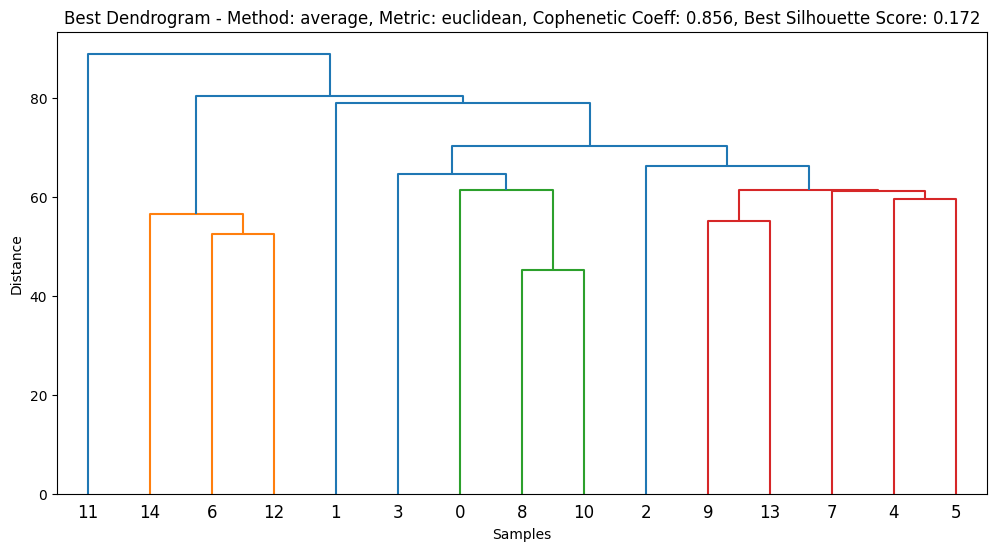


Best Combination for Test Data:
Method: average
Metric: euclidean
Cophenetic Coefficient: 0.856
Best Number of Clusters: 2
Best Silhouette Score: 0.172


In [ ]:
methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cityblock']

best_coefficient = -1
best_combination = {'method': None, 'metric': None}

for method in methods:
    for metric in distance_metrics:
        if method == 'ward' and metric != 'euclidean':
            continue

        distance_matrix = pdist(test_processed, metric=metric)
        linkage_matrix = sch.linkage(distance_matrix, method=method)

        coefficient, _ = cophenet(linkage_matrix, distance_matrix)

        if coefficient > best_coefficient:
            best_coefficient = coefficient
            best_combination = {'method': method, 'metric': metric}

distance_matrix = pdist(test_processed, metric=best_combination['metric'])
linkage_matrix = sch.linkage(distance_matrix, method=best_combination['method'])

best_silhouette_score = -1
best_num_clusters = 0

for num_clusters in range(2, 11):
    clusters = sch.fcluster(linkage_matrix, num_clusters, criterion='maxclust')

    silhouette_avg = silhouette_score(test_processed, clusters, metric=best_combination['metric'])

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_num_clusters = num_clusters

clusters = sch.fcluster(linkage_matrix, best_num_clusters, criterion='maxclust')

silhouette_avg = silhouette_score(test_processed, clusters, metric=best_combination['metric'])

plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.title(f"Best Dendrogram - Method: {best_combination['method']}, Metric: {best_combination['metric']}, "
          f"Cophenetic Coeff: {round(best_coefficient, 3)}, Best Silhouette Score: {round(best_silhouette_score, 3)}")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

print("\nBest Combination for Test Data:")
print(f"Method: {best_combination['method']}")
print(f"Metric: {best_combination['metric']}")
print(f"Cophenetic Coefficient: {round(best_coefficient, 3)}")
print(f"Best Number of Clusters: {best_num_clusters}")
print(f"Best Silhouette Score: {round(best_silhouette_score, 3)}")



## Partitional Clustering

We will perform partitional clustering to divide the dataset into a predefined number of clusters, aiming to maximize within-cluster similarity and minimize inter-cluster similarity.

K: 2, Silhouette Score: 0.29284112128249606
K: 3, Silhouette Score: 0.26287755493012566
K: 4, Silhouette Score: 0.2716221633620342
K: 5, Silhouette Score: 0.17025934547628555
K: 6, Silhouette Score: 0.05844939925447009
K: 7, Silhouette Score: 0.04099956409508796
K: 8, Silhouette Score: 0.11924006927789495
K: 9, Silhouette Score: 0.02810052662465685


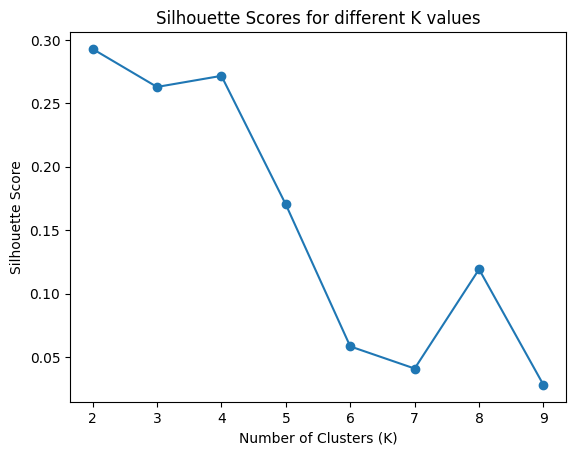

In [ ]:
from sklearn.cluster import KMeans

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(train_processed)
    score = silhouette_score(train_processed, labels)
    silhouette_scores.append(score)
    print(f'K: {k}, Silhouette Score: {score}')


plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for different K values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


The best average silhouette score
is achieved with 2 clusters. The 2 methods tried so far (hierarchical clustering and silhouette scores ) have given the same result, so is safe to assume that 2 is probably the best number of clusters to work with this data.


Silhouette Score: 0.29284112128249606


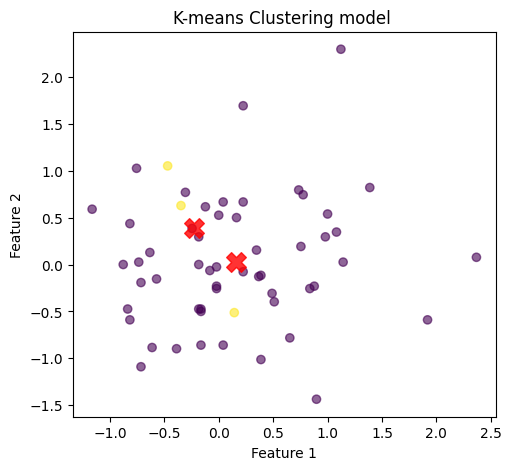

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(train_processed)

kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.scatter(train_processed[:, 5], train_processed[:, 9], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 5], centroids[:, 9], c='red', s=200, alpha=0.8, marker='X')
plt.title('K-means Clustering model ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

silhouette_avg = silhouette_score(train_processed, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')

plt.show()

This analysis will also extend to the test data to evaluate the consistency and generalizability of the partitional clustering results.

Silhouette Score: 0.036197537859216165


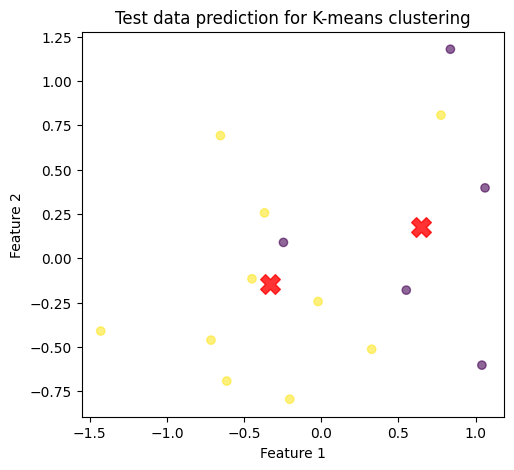

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(test_processed)

kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.scatter(test_processed[:, 5], test_processed[:, 9], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 5], centroids[:, 9], c='red', s=200, alpha=0.8, marker='X')
plt.title('Test data prediction for K-means clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

silhouette_avg = silhouette_score(test_processed, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')

plt.show()

To visualize the data in two dimensions, PCA is applied to reduce the dimensionality of the original dataset while retaining as much variance as possible.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
train_pca = pca.fit_transform(train_processed)


Silhouette Score: 0.3845134682167377


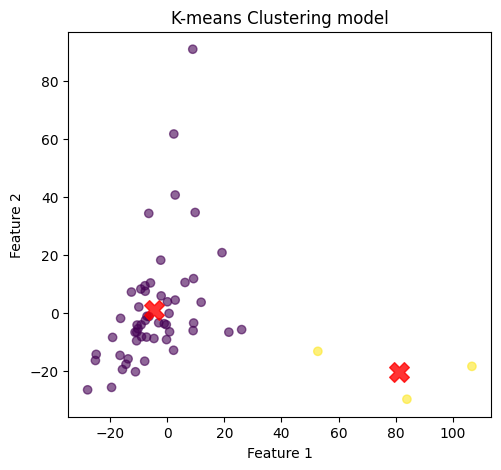

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(train_pca)

kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.8, marker='X')
plt.title('K-means Clustering model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

silhouette_avg = silhouette_score(train_pca, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')

plt.show()

PCA provides better visualizations for high-dimensional data because it reduces the dimensionality while retaining the most important variance in the dataset. Instead of using just 2 columns of  the final_df, PCA  identifies the directions (principal components) in which the data varies the most, capturing the most significant features of the data, potentially making clusters or relationships between data points more visible.

## DBSCAN

We will perform DBSCAN by exploring a parameter grid with different eps and min_samples values, aiming to identify density-based clusters and assess their quality in the dataset.

No valid clusters found during grid search.


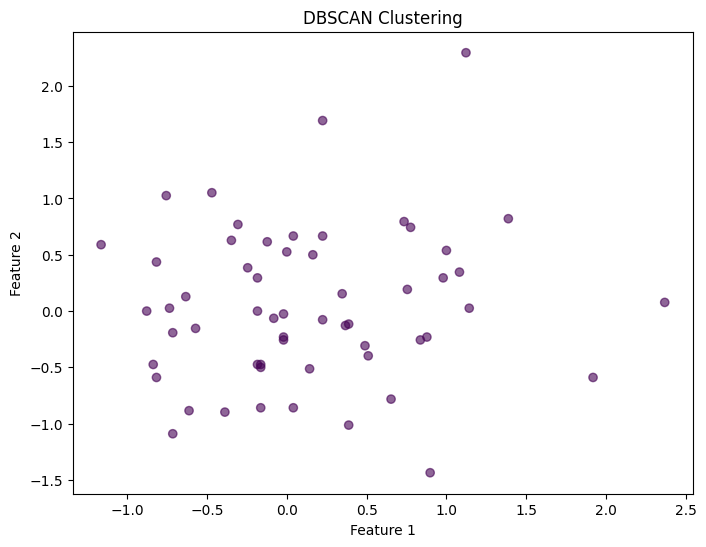

In [ ]:
from sklearn.cluster import DBSCAN

eps_values = np.arange(0.5, 2.5, 5)
min_samples_values = [3, 5, 10, 15, 20]

best_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(train_processed)

        unique_labels = set(labels)
        if len(unique_labels) > 1:
            score = silhouette_score(train_processed, labels)
            print(f"eps: {eps:.2f}, min_samples: {min_samples}, Silhouette Score: {score:.4f}")

            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

if best_params:
    print("\nBest Parameters:", best_params)
    print("Best Silhouette Score:", best_score)

    best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
    best_labels = best_dbscan.fit_predict(train_processed)
else:
    print("No valid clusters found during grid search.")
    best_labels = np.zeros(train_processed.shape[0], dtype=int)

plt.figure(figsize=(8, 6))
plt.scatter(train_processed[:, 5], train_processed[:, 9], c=best_labels, cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


PCA is applied again to reduce the dataset's dimensionality, enabling DBSCAN to operate in a two-dimensional space, simplifying the visualization and analysis of potential density-based clusters.

No valid clusters found during grid search.


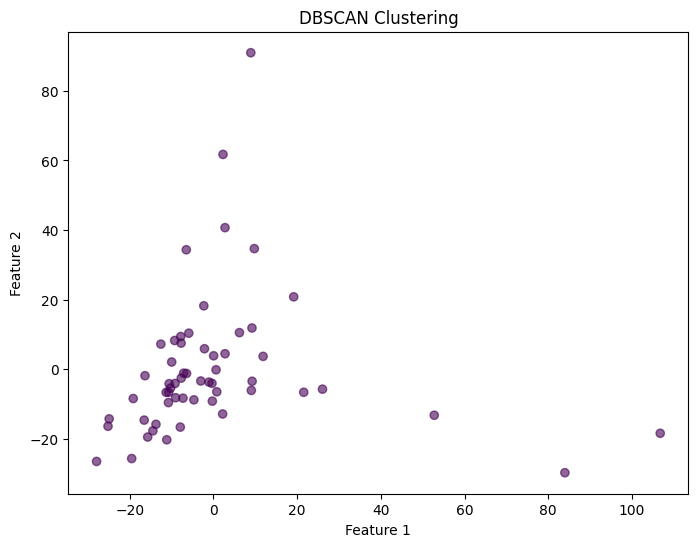

In [ ]:
data = train_pca

dbscan = DBSCAN(eps=15, min_samples=100)
labels = dbscan.fit_predict(data)

eps_values = np.arange(0.5, 2.5, 5)
min_samples_values = [3, 5, 10, 15, 20]

best_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        unique_labels = set(labels)
        if len(unique_labels) > 1:
            score = silhouette_score(data, labels)
            print(f"eps: {eps:.2f}, min_samples: {min_samples}, Silhouette Score: {score:.4f}")

            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

if best_params:
    print("\nBest Parameters:", best_params)
    print("Best Silhouette Score:", best_score)

    best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
    best_labels = best_dbscan.fit_predict(data)
else:
    print("No valid clusters found during grid search.")
    best_labels = np.zeros(data.shape[0], dtype=int)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Gaussian Mixture Model



Finally, we will perform GMM clustering using a parameter grid to explore different numbers of components and covariance types to find the best configuration for our dataset.

n_components: 2, covariance_type: full, BIC: 29862361.709391605
n_components: 3, covariance_type: full, BIC: 45724822.05129403
n_components: 4, covariance_type: full, BIC: 61585909.60007397
n_components: 5, covariance_type: full, BIC: 77449801.16470483
n_components: 6, covariance_type: full, BIC: 93310080.18665276
n_components: 7, covariance_type: full, BIC: 109175699.21227515
n_components: 2, covariance_type: tied, BIC: 14023792.725318037
n_components: 3, covariance_type: tied, BIC: 14034027.821478464
n_components: 4, covariance_type: tied, BIC: 14044230.116534187
n_components: 5, covariance_type: tied, BIC: 14054438.699811436
n_components: 6, covariance_type: tied, BIC: 14064689.247758344
n_components: 7, covariance_type: tied, BIC: 14074895.13418125
n_components: 2, covariance_type: diag, BIC: 445649.9664256241
n_components: 3, covariance_type: diag, BIC: 449227.3934203234
n_components: 4, covariance_type: diag, BIC: 457757.5367606064
n_components: 5, covariance_type: diag, BIC: 467

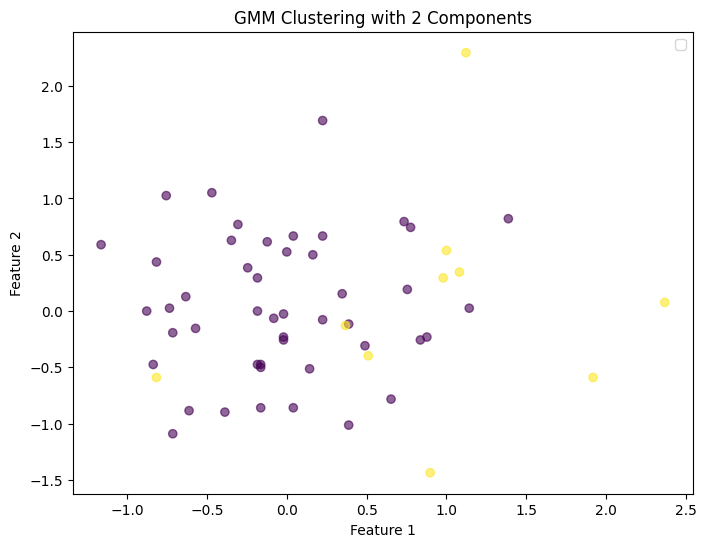

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import ParameterGrid

param_grid = {
    'n_components': [2, 3, 4, 5, 6, 7],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
}

best_bic = np.inf
best_params = None
best_gmm = None
best_labels = None

for params in ParameterGrid(param_grid):

    gmm = GaussianMixture(**params, random_state=42)
    gmm.fit(train_processed)
    bic = gmm.bic(train_processed)

    labels = gmm.predict(train_processed)

    if bic < best_bic:
        best_bic = bic
        best_params = params
        best_gmm = gmm
        best_labels = labels

    print(f"n_components: {params['n_components']}, covariance_type: {params['covariance_type']}, BIC: {bic}")

print(f"\nBest Parameters: {best_params}")
print(f"Best BIC: {best_bic}")


best_labels = best_gmm.predict(train_processed)
means = best_gmm.means_

plt.figure(figsize=(8, 6))
plt.scatter(train_processed[:, 5],train_processed[:, 9], c=best_labels, cmap='viridis', alpha=0.6)
plt.title(f'GMM Clustering with {best_params["n_components"]} Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

The same GMM analysis was performed on the test data.

BIC for Test Data: 138502.36517625768
Silhouette Score for Test Data: 0.03585563756301584

Best Parameters: {'covariance_type': 'diag', 'n_components': 2}


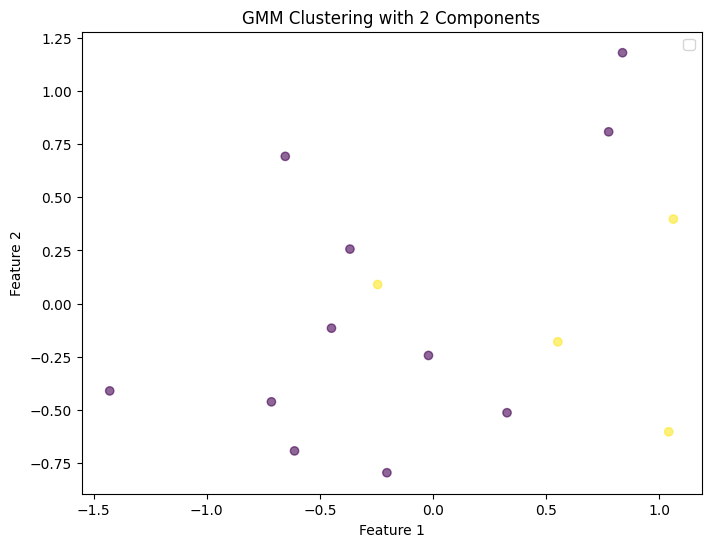

In [ ]:
test_labels = best_gmm.predict(test_processed)
bic_test = best_gmm.bic(test_processed)
print(f"BIC for Test Data: {bic_test}")
silhouette_test = silhouette_score(test_processed, test_labels)
print(f"Silhouette Score for Test Data: {silhouette_test}")
print(f"\nBest Parameters: {best_params}")

plt.figure(figsize=(8, 6))

plt.scatter(test_processed[:, 5], test_processed[:, 9], c=test_labels, cmap='viridis', alpha=0.6)
plt.title(f'GMM Clustering with {best_params["n_components"]} Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


The PCA technique was applied again.


Best Parameters: {'covariance_type': 'full', 'n_components': 6}
Best BIC: 6684.619585674896


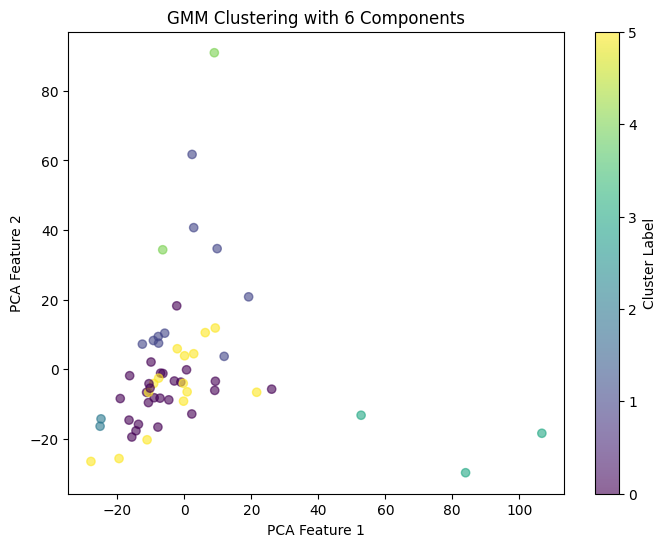

In [ ]:
param_grid = {
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
}

best_bic = np.inf
best_params = None
best_gmm = None
best_labels = None

for params in ParameterGrid(param_grid):
    gmm = GaussianMixture(**params, random_state=42)
    gmm.fit(train_pca)
    bic = gmm.bic(train_pca)

    if bic < best_bic:
        best_bic = bic
        best_params = params
        best_gmm = gmm
        best_labels = gmm.predict(train_pca)

print(f"\nBest Parameters: {best_params}")
print(f"Best BIC: {best_bic}")

plt.figure(figsize=(8, 6))
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=best_labels, cmap='viridis', alpha=0.6)
plt.title(f'GMM Clustering with {best_params["n_components"]} Components')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()
